In [6]:
import pandas as pd
import numpy as np
from pathlib import Path

# Always anchor relative to this notebook location
ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd()
DATA = ROOT / "data" / "raw"

train_features = pd.read_csv(DATA / "training_set_features.csv")
train_labels   = pd.read_csv(DATA / "training_set_labels.csv")
test_features  = pd.read_csv(DATA / "test_set_features.csv")

In [ ]:
# Basic info: shape, columns, dtypes

print("Train features:", train_features.shape)
print("Train labels:", train_labels.shape)
print("Test features:", test_features.shape)

print("\n--- Column Info ---")
train_features.info()

Train features: (26707, 36)
Train labels: (26707, 3)
Test features: (26708, 36)

--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24

In [8]:
# Check missing values

print("\n--- Missing Values (Train Features) ---")
print(train_features.isnull().sum().sort_values(ascending=False).head(20))

print("\n--- Missing Values (Train Labels) ---")
print(train_labels.isnull().sum())


--- Missing Values (Train Features) ---
employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
dtype: int64

--- Missing Values (Train Labels) ---
respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


In [9]:
# Automated profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(train_features, title="Training Features Profile", explorative=True)
# save as HTML
profile.to_file("reports/train_features_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:01<00:00, 29.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Numerical feature summary
num_features = train_features.select_dtypes(include=[np.number])

print("Number of numerical features:", num_features.shape[1])
display(num_features.describe().T)

Number of numerical features: 24


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [11]:
# Categorical feature summary
cat_features = train_features.select_dtypes(exclude=[np.number])

print("Number of categorical features:", cat_features.shape[1])

# Show top 5 categories for each categorical feature
for col in cat_features.columns:
    print(f"\nColumn: {col}")
    print(cat_features[col].value_counts(normalize=True).head())

Number of categorical features: 12

Column: age_group
age_group
65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: proportion, dtype: float64

Column: education
education
College Graduate    0.399091
Some College        0.278379
12 Years            0.229130
< 12 Years          0.093399
Name: proportion, dtype: float64

Column: race
race
White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: proportion, dtype: float64

Column: sex
sex
Female    0.593777
Male      0.406223
Name: proportion, dtype: float64

Column: income_poverty
income_poverty
<= $75,000, Above Poverty    0.573371
> $75,000                    0.305600
Below Poverty                0.121029
Name: proportion, dtype: float64

Column: marital_status
marital_status
Married        0.535792
Not Married    0.464208
Name: proportion, dtype: float64

Column: rent_or_own
rent_or_

In [13]:
# Explore target variables

print("\n--- Target Variable Distribution ---")
print(train_labels.describe())

# Value counts for each target
print("\nH1N1 Vaccine Distribution:")
print(train_labels['h1n1_vaccine'].value_counts(normalize=True))

print("\nSeasonal Vaccine Distribution:")
print(train_labels['seasonal_vaccine'].value_counts(normalize=True))


--- Target Variable Distribution ---
       respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000

H1N1 Vaccine Distribution:
h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

Seasonal Vaccine Distribution:
seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64


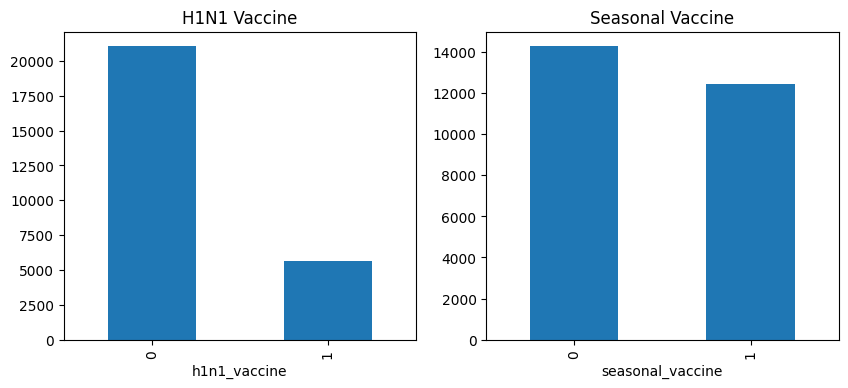

In [14]:
# Visualize class balance

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_labels['h1n1_vaccine'].value_counts().plot(kind='bar', ax=axes[0], title='H1N1 Vaccine')
train_labels['seasonal_vaccine'].value_counts().plot(kind='bar', ax=axes[1], title='Seasonal Vaccine')

plt.show()

,missing_count,missing_pct
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


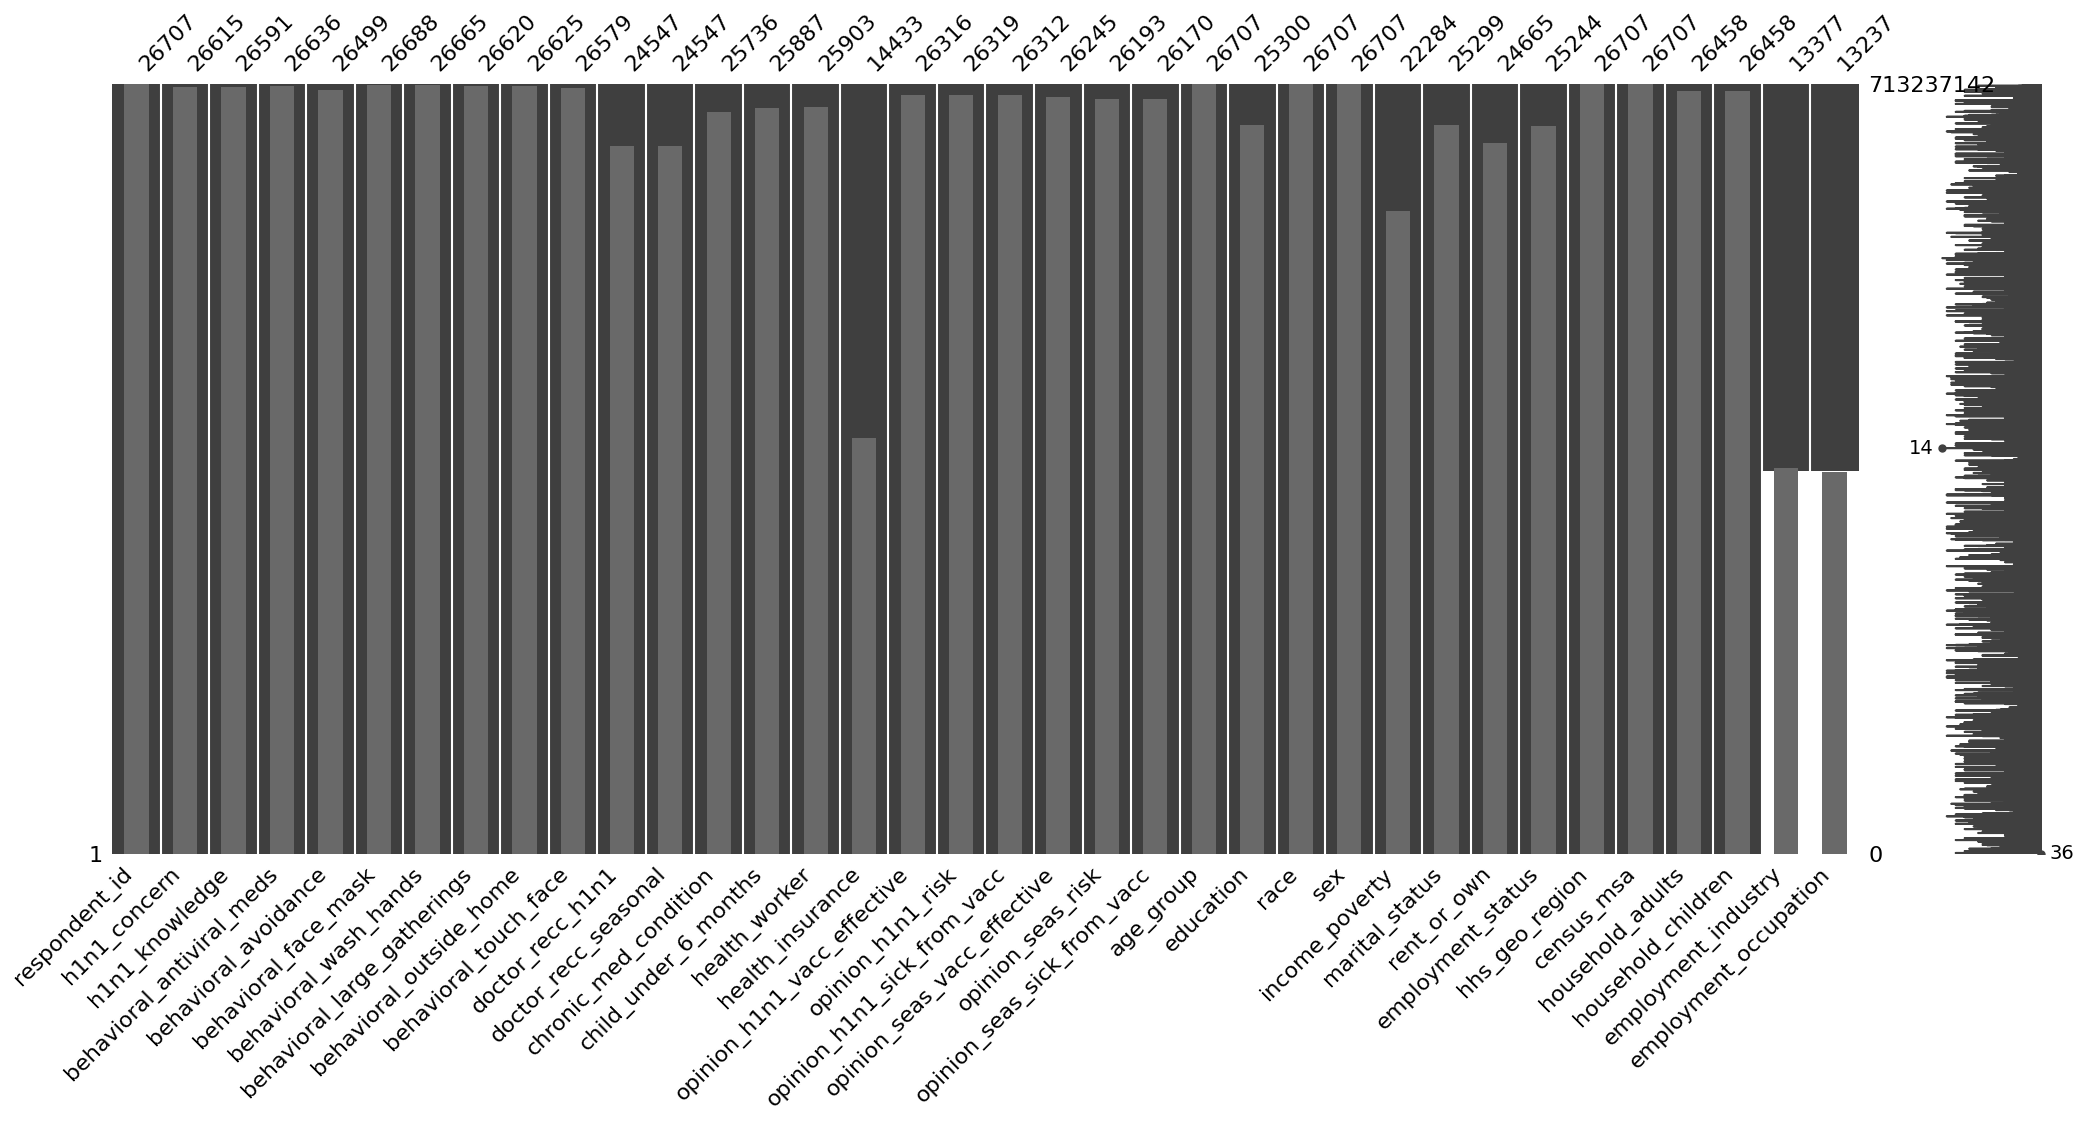

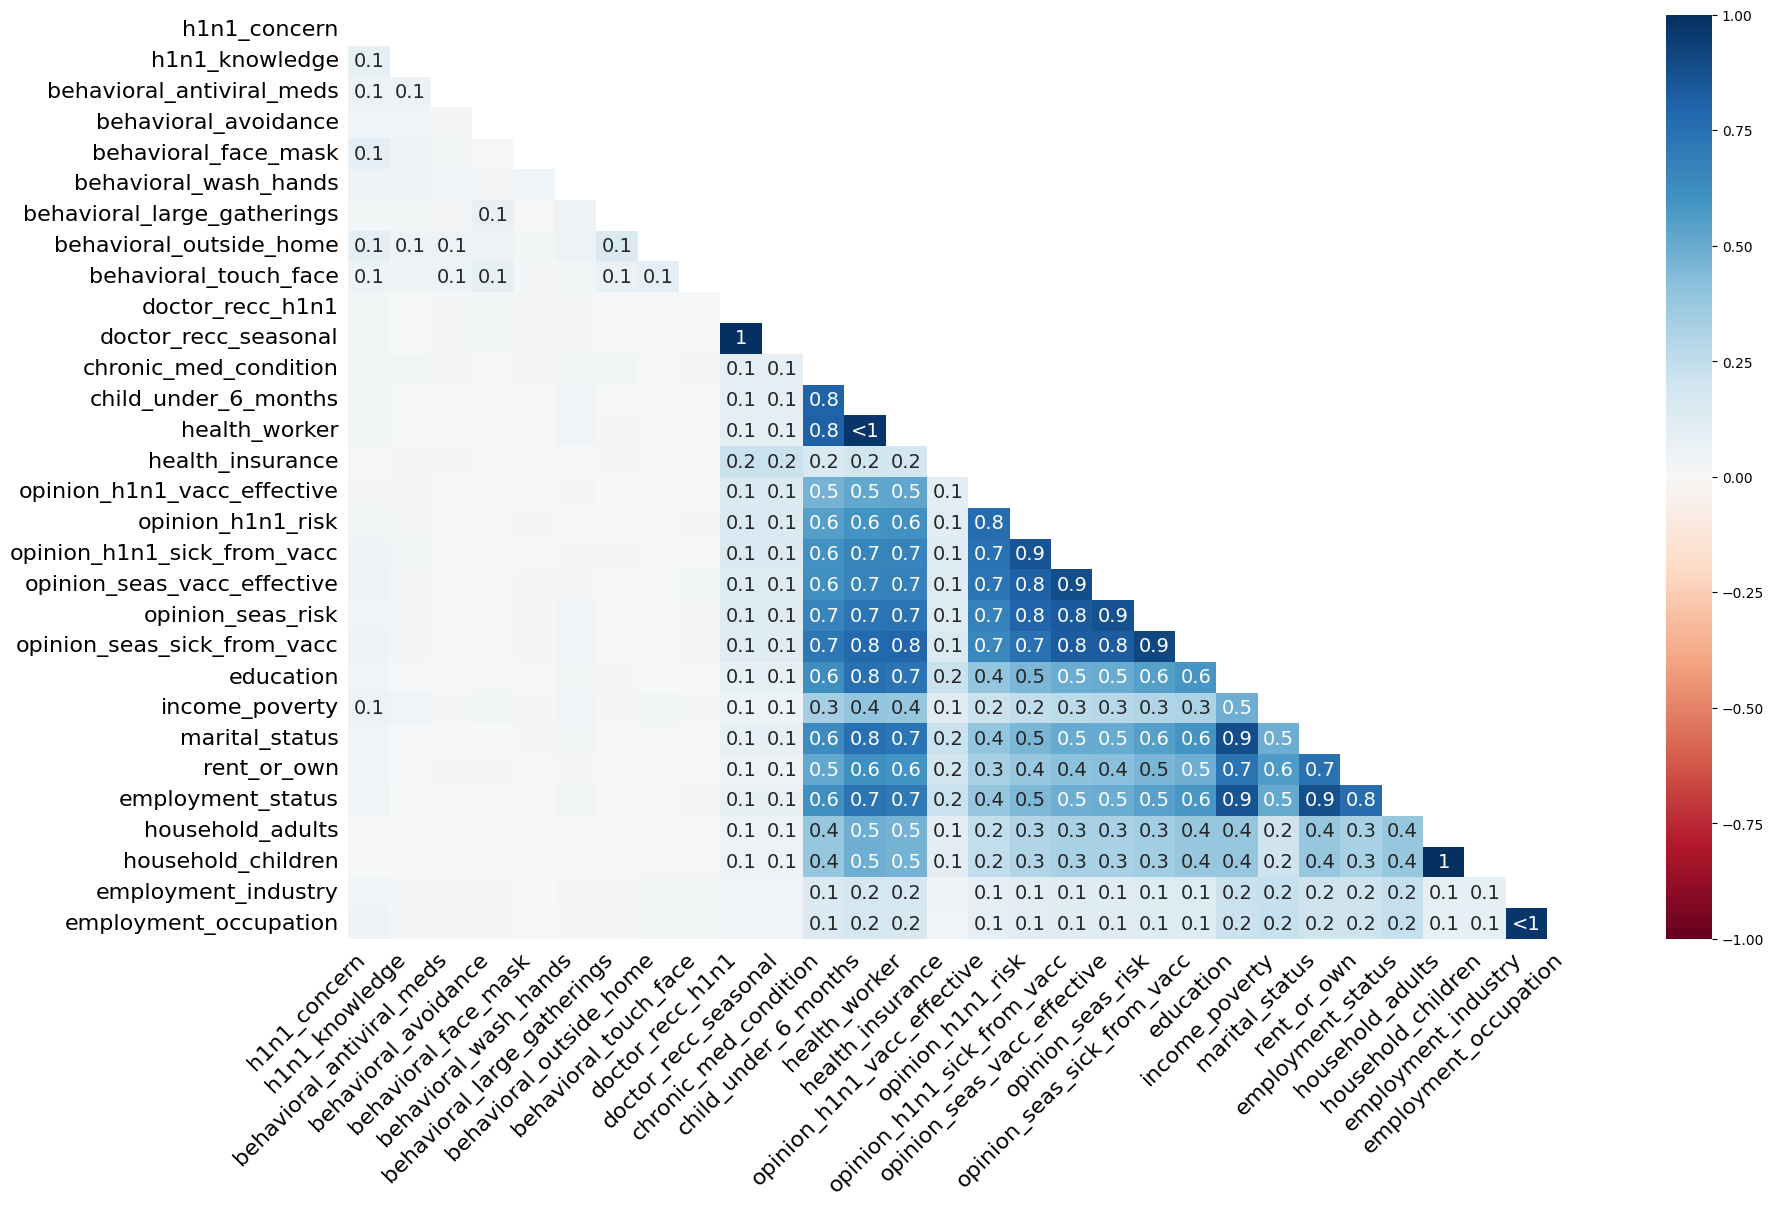

In [ ]:
import missingno as msno

# Visualize missing values
msno.matrix(train_features)
msno.bar(train_features)

# Correlation of missingness
msno.heatmap(train_features)

# Summary table
missing_summary = (
    train_features.isnull().sum()
    .to_frame(name="missing_count")
    .assign(missing_pct=lambda x: x["missing_count"] / len(train_features) * 100)
    .sort_values("missing_count", ascending=False)
)
display(missing_summary.head(15))